In [1]:
import cv2 as cv
from skimage import io
import os
import keras
import tensorflow as tf
from keras.layers import Dropout
from keras.applications.xception import decode_predictions
from keras.preprocessing.image import img_to_array
from keras.models import Sequential
from keras.preprocessing import image
from keras import datasets,layers,models
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.applications.xception import Xception
from PIL import Image
from google.colab.patches import cv2_imshow
import glob
from keras.models import Model
import numpy as np
import pandas as pd
import shutil
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,accuracy_score
from natsort import natsorted
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
fname="/content/drive/My Drive/Logical Rythm Img class.zip"
with ZipFile(fname,'r') as zipper:
  zipper.extractall()
  print('Done')

Done


In [3]:
train_path=r'/content/Train'
test_path=r'/content/Test'

In [4]:
df=pd.read_csv('/content/Logical Rythm Img class/train_labels.csv')
df

,image,sports
0,./train/0.jpg,baseball
1,./train/1.jpg,formula1
2,./train/2.jpg,fencing
3,./train/3.jpg,motogp
4,./train/4.jpg,ice_hockey
...,...,...
11035,./train/11035.jpg,motogp
11036,./train/11036.jpg,motogp
11037,./train/11037.jpg,football
11038,./train/11038.jpg,football


In [5]:
y=df.iloc[:,-1]
y.value_counts()

badminton         698
football          611
volleyball        565
ice_hockey        559
tennis            555
baseball          555
boxing            542
formula1          539
gymnastics        531
swimming          531
table_tennis      530
motogp            513
wwe               508
cricket           501
fencing           494
weight_lifting    450
wrestling         432
shooting          417
hockey            405
chess             375
basketball        375
kabaddi           354
Name: sports, dtype: int64

In [6]:
sports=[]

for i in y.unique():
  sports.append(i)
sports.sort()
sports

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [7]:
le=LabelEncoder()
y=le.fit_transform(y)
for i in range(10):
  print(y[i])
  

1
8
6
13
11
20
13
3
18
18


In [8]:
sports

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [9]:
if os.path.exists(train_path):
  shutil.rmtree(train_path)
os.mkdir(train_path)

if os.path.exists(test_path):
  shutil.rmtree(test_path)
os.mkdir(test_path)

train_path='/content/Train'
test_path='/content/Test'

In [10]:
for i in sports:
  if os.path.exists(r'/content/Train/'+i):
    shutil.rmtree(r'/content/Train/'+i)
  os.mkdir(r'/content/Train/'+i)

In [11]:
img_dirs=[]
for entry in os.scandir('/content/Train/'):
  if entry.is_dir():
    img_dirs.append(entry.path)
img_dirs

['/content/Train/boxing',
 '/content/Train/volleyball',
 '/content/Train/badminton',
 '/content/Train/kabaddi',
 '/content/Train/wrestling',
 '/content/Train/swimming',
 '/content/Train/baseball',
 '/content/Train/fencing',
 '/content/Train/shooting',
 '/content/Train/basketball',
 '/content/Train/football',
 '/content/Train/wwe',
 '/content/Train/ice_hockey',
 '/content/Train/chess',
 '/content/Train/formula1',
 '/content/Train/table_tennis',
 '/content/Train/tennis',
 '/content/Train/gymnastics',
 '/content/Train/cricket',
 '/content/Train/motogp',
 '/content/Train/weight_lifting',
 '/content/Train/hockey']

In [12]:
img_dirs.sort()
img_dirs

['/content/Train/badminton',
 '/content/Train/baseball',
 '/content/Train/basketball',
 '/content/Train/boxing',
 '/content/Train/chess',
 '/content/Train/cricket',
 '/content/Train/fencing',
 '/content/Train/football',
 '/content/Train/formula1',
 '/content/Train/gymnastics',
 '/content/Train/hockey',
 '/content/Train/ice_hockey',
 '/content/Train/kabaddi',
 '/content/Train/motogp',
 '/content/Train/shooting',
 '/content/Train/swimming',
 '/content/Train/table_tennis',
 '/content/Train/tennis',
 '/content/Train/volleyball',
 '/content/Train/weight_lifting',
 '/content/Train/wrestling',
 '/content/Train/wwe']

In [13]:
sports

['badminton',
 'baseball',
 'basketball',
 'boxing',
 'chess',
 'cricket',
 'fencing',
 'football',
 'formula1',
 'gymnastics',
 'hockey',
 'ice_hockey',
 'kabaddi',
 'motogp',
 'shooting',
 'swimming',
 'table_tennis',
 'tennis',
 'volleyball',
 'weight_lifting',
 'wrestling',
 'wwe']

In [14]:
total=0
for img_dir in img_dirs:
  count=0
  sport_name=img_dir.split('/')[-1]

In [15]:
files=natsorted(glob.glob(r'/content/Logical Rythm Img class/train/*'))
print(files)

['/content/Logical Rythm Img class/train/0.jpg', '/content/Logical Rythm Img class/train/1.jpg', '/content/Logical Rythm Img class/train/2.jpg', '/content/Logical Rythm Img class/train/3.jpg', '/content/Logical Rythm Img class/train/4.jpg', '/content/Logical Rythm Img class/train/5.jpg', '/content/Logical Rythm Img class/train/6.jpg', '/content/Logical Rythm Img class/train/7.jpg', '/content/Logical Rythm Img class/train/8.jpg', '/content/Logical Rythm Img class/train/9.jpg', '/content/Logical Rythm Img class/train/10.jpg', '/content/Logical Rythm Img class/train/11.jpg', '/content/Logical Rythm Img class/train/12.jpg', '/content/Logical Rythm Img class/train/13.jpg', '/content/Logical Rythm Img class/train/14.jpg', '/content/Logical Rythm Img class/train/15.jpg', '/content/Logical Rythm Img class/train/16.jpg', '/content/Logical Rythm Img class/train/17.jpg', '/content/Logical Rythm Img class/train/18.jpg', '/content/Logical Rythm Img class/train/19.jpg', '/content/Logical Rythm Img c

In [16]:
y[0]

1

In [17]:
len(sports)

22

In [18]:
c=0
g=0
name=""
for i in files:
  img=cv.imread(i)
  sport_name=sports[y[c]]
  c+=1
  index=0
  for j in img_dirs:
    temp=j.split('/')[-1]
    if(temp==sport_name):
      file_path=img_dirs[index]+"/"+str(c)+".png"
      cv.imwrite(file_path,img)
    else:
      index+=1

DATA AUGMENTATION

In [19]:
#gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
   # channel_shift_range=10., horizontal_flip=True)
#a=[]
#for i in os.scandir(r'/content/Train'):
#  a.append(i.path)
#for i in a:
#  path=i+'/*'
#  for j in glob.glob(path):
#    image = np.expand_dims(plt.imread(j),0)
#    aug_iter = gen.flow(image, save_to_dir=i, save_prefix='aug-image-', save_format='jpg')
#    aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(1)]

MODEL BUILDING & TRAINING


In [20]:
train_path='/content/Train'
test_path='/content/Logical Rythm Img class/test'

In [21]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=sports, batch_size=10)

Found 11040 images belonging to 22 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

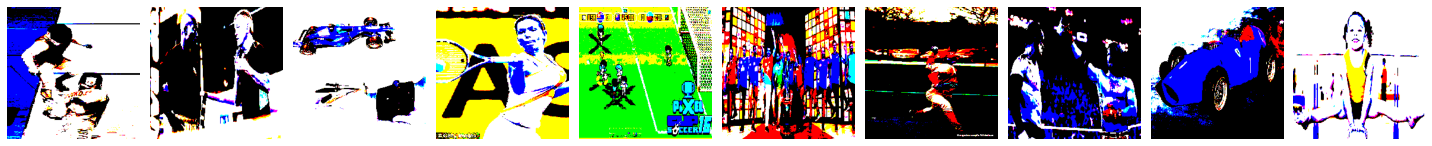

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [24]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

In [37]:
vgg19_model = tf.keras.applications.vgg19.VGG19()

574717952/574710816 [==============================] - 5s 0us/step


In [38]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [39]:
model = Sequential()
for layer in vgg19_model.layers[:-1]:
    model.add(layer)

In [40]:
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=22, activation='softmax'))

In [41]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
1104/1104 - 103s - loss: 1.1653 - accuracy: 0.6609
Epoch 2/5
1104/1104 - 73s - loss: 0.5570 - accuracy: 0.8337
Epoch 3/5
1104/1104 - 73s - loss: 0.4194 - accuracy: 0.8720
Epoch 4/5
1104/1104 - 73s - loss: 0.3300 - accuracy: 0.9041
Epoch 5/5
1104/1104 - 73s - loss: 0.2667 - accuracy: 0.9245


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [44]:
  a=[]
  for i in natsorted(glob.glob('/content/Logical Rythm Img class/test/*')):
    print(i)
    im = cv.resize(cv.imread(i), (224, 224)).astype(np.float32)
    im = np.expand_dims(im, axis=0)
    out = model.predict(im)
    i=np.argmax(out)
    val=sports[int(i)]
    a.append(val)

/content/Logical Rythm Img class/test/0.jpg
/content/Logical Rythm Img class/test/1.jpg
/content/Logical Rythm Img class/test/2.jpg
/content/Logical Rythm Img class/test/3.jpg
/content/Logical Rythm Img class/test/4.jpg
/content/Logical Rythm Img class/test/5.jpg
/content/Logical Rythm Img class/test/6.jpg
/content/Logical Rythm Img class/test/7.jpg
/content/Logical Rythm Img class/test/8.jpg
/content/Logical Rythm Img class/test/9.jpg
/content/Logical Rythm Img class/test/10.jpg
/content/Logical Rythm Img class/test/11.jpg
/content/Logical Rythm Img class/test/12.jpg
/content/Logical Rythm Img class/test/13.jpg
/content/Logical Rythm Img class/test/14.jpg
/content/Logical Rythm Img class/test/15.jpg
/content/Logical Rythm Img class/test/16.jpg
/content/Logical Rythm Img class/test/17.jpg
/content/Logical Rythm Img class/test/18.jpg
/content/Logical Rythm Img class/test/19.jpg
/content/Logical Rythm Img class/test/20.jpg
/content/Logical Rythm Img class/test/21.jpg
/content/Logical Ryt

In [45]:
df=pd.read_csv('/content/Logical Rythm Img class/test_images_list.csv')

In [46]:
df['sports']=a

In [47]:
df.head()

,image,sports
0,./test/0.jpg,football
1,./test/1.jpg,motogp
2,./test/2.jpg,ice_hockey
3,./test/3.jpg,chess
4,./test/4.jpg,fencing


In [48]:
df.to_csv('Submission.csv',index=False)

In [49]:
import pickle
import dill
import weakref
import joblib

In [50]:
import pickle

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils


def unpack(model, training_config, weights):
    restored_model = deserialize(model)
    if training_config is not None:
        restored_model.compile(
            **saving_utils.compile_args_from_training_config(
                training_config
            )
        )
    restored_model.set_weights(weights)
    return restored_model

# Hotfix function
def make_keras_picklable():

    def __reduce__(self):
        model_metadata = saving_utils.model_metadata(self)
        training_config = model_metadata.get("training_config", None)
        model = serialize(self)
        weights = self.get_weights()
        return (unpack, (model, training_config, weights))

    cls = Model
    cls.__reduce__ = __reduce__

# Run the function
make_keras_picklable()

# Save
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [51]:
make_keras_picklable()

In [52]:
model

In [53]:
pickle_in=open("model.pkl","rb")
new_model=pickle.load(pickle_in)
  

In [54]:
pickle_in

<_io.BufferedReader name='model.pkl'>

In [55]:
new_model

In [56]:
im = cv.resize(cv.imread('/content/Logical Rythm Img class/train/10.jpg'), (224, 224)).astype(np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


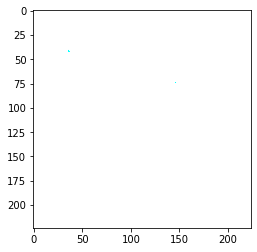

In [57]:
plt.imshow(im)

In [58]:
im = np.expand_dims(im, axis=0)
out = new_model.predict(im)
i=np.argmax(out)

In [59]:
print(i)

5


In [60]:
val=sports[int(i)]
print(val)

cricket
